# **Apply image processing techniques (Scaling, Rotation, Blurring, Edge Detection) using OpenCV**

## **Step 1: Install OpenCV**

In [1]:
!pip install opencv-python-headless


**OpenCV** is a powerful library for image processing. The opencv-python-headless package is installed using the pip command in Google Colab. This version of OpenCV is designed for use in environments where GUI operations are not necessary, like in Colab.

## **Step 2: Import Necessary Librari**es

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display an image using matplotlib
def display_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to display two images side by side
def display_images(img1, img2, title1="Image 1", title2="Image 2"):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()


* **cv2:** This imports OpenCV, which provides functions for image processing.
* **numpy (np):** This library is used for handling arrays and matrices, which images are represented as.
* **matplotlib.pyplot (plt):** This is used to display images in a Jupyter notebook or Google Colab environment.

## **Step 3: Load an Image**

Saving Orencia.png to Orencia.png


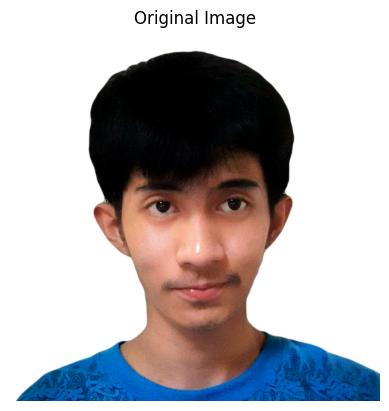

In [3]:
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload an image
uploaded = files.upload()

# Convert to OpenCV format
image_path = next(iter(uploaded))  # Get the image file name
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

display_image(image, "Original Image")


* **display_image():** Converts the image from BGR (OpenCV's default color format) to RGB (the format expected by matplotlib) and displays it using imshow().
* **display_images():** This function allows two images to be displayed side by side for comparison. We use subplot to create a grid of plots (here, 1 row and 2 columns).

# **Exercise 1: Scaling and Rotation**

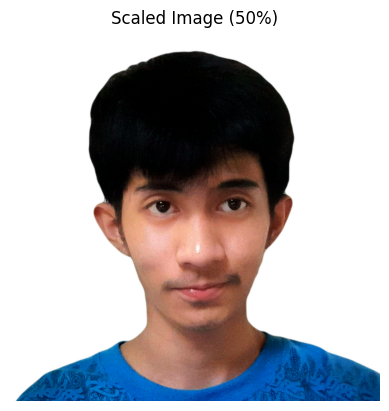

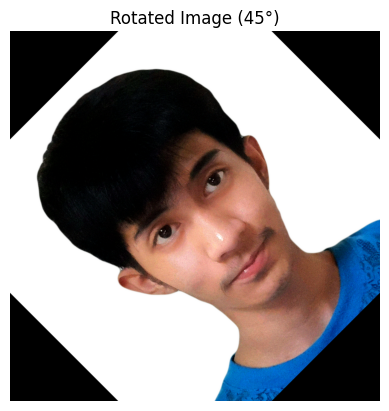

'\nThese lines apply the scaling and rotation functions to the uploaded image and display the results.\n'

In [4]:
# Scaling
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scaled_img = cv2.resize(img,
(int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
    return scaled_img

"""
scale_image(): This function scales the image by a given factor.
The cv2.resize() function takes the original dimensions of the image,
multiplies them by the scale_factor, and resizes the image accordingly.
INTER_LINEAR is a common interpolation method for resizing.
"""

# Rotate
def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, matrix, (width, height))
    return rotated_img

"""
rotate_image(): Rotates the image around its center. cv2.getRotationMatrix2D() creates
a transformation matrix for rotation, and cv2.warpAffine() applies this transformation.
The angle parameter controls the degree of rotation.
"""

# Scale image by 0.5
scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image (50%)")

# Rotate image by 45 degrees
rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image (45°)")

"""
These lines apply the scaling and rotation functions to the uploaded image and display the results.
"""

# **Exercise 2: Blurring Techniques**

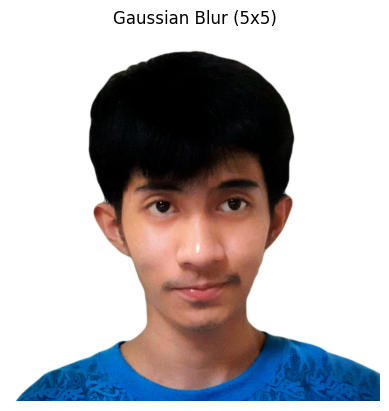

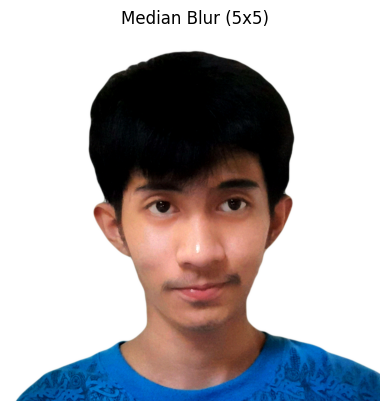

"\ncv2.medianBlur(): Applies a median blur, which replaces each pixel's value with the\nmedian value of its neighbors in a 5x5 kernel. This method is particularly effective in\nremoving salt-and-pepper noise.\n"

In [5]:
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
display_image(gaussian_blur, "Gaussian Blur (5x5)")

"""
cv2.GaussianBlur(): Applies a Gaussian blur to the image, which smooths it by averaging
the pixel values in a 5x5 kernel (a small matrix). This is useful for reducing noise in an image.
"""

# Median Blur
median_blur = cv2.medianBlur(image, 5)
display_image(median_blur, "Median Blur (5x5)")

"""
cv2.medianBlur(): Applies a median blur, which replaces each pixel's value with the
median value of its neighbors in a 5x5 kernel. This method is particularly effective in
removing salt-and-pepper noise.
"""


# **Exercise 3: Edge Detection using Canny**

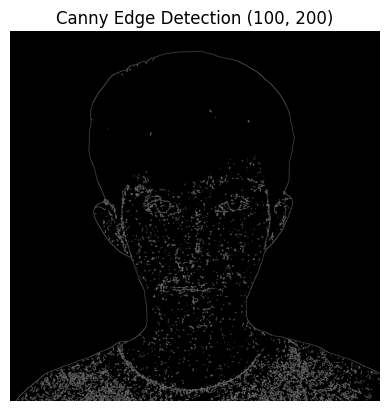

"\ncv2.Canny(): Detects edges in the image by calculating the gradient (rate of intensity change)\nbetween pixels. The two threshold values (100 and 200) define the edges'\nsensitivity. Lower thresholds detect more edges, while higher thresholds detect only the\nmost prominent edges.\n"

In [6]:
# Canny Edge Detection
edges = cv2.Canny(image, 100, 200)
display_image(edges, "Canny Edge Detection (100, 200)")

"""
cv2.Canny(): Detects edges in the image by calculating the gradient (rate of intensity change)
between pixels. The two threshold values (100 and 200) define the edges'
sensitivity. Lower thresholds detect more edges, while higher thresholds detect only the
most prominent edges.
"""


# **Exercise 4: Basic Image Processor (Interactive)**

Enter action (scale, rotate, gaussian_blur, median_blur, canny): canny


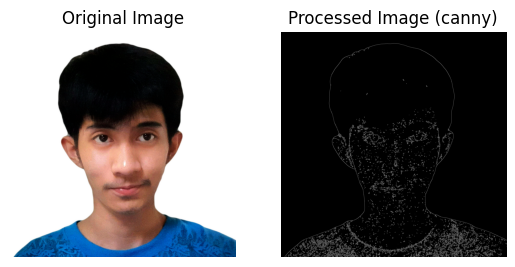

'\nThis allows users to enter their desired transformation interactively (via the\ninput() function). It processes the image and displays both the original and transformed\nversions side by side.\n'

In [7]:
def process_image(img, action):
    if action == 'scale':
        return scale_image(img, 0.5)
    elif action == 'rotate':
        return rotate_image(img, 45)
    elif action == 'gaussian_blur':
        return cv2.GaussianBlur(img, (5, 5), 0)
    elif action == 'median_blur':
        return cv2.medianBlur(img, 5)
    elif action == 'canny':
        return cv2.Canny(img, 100, 200)
    else:
        return img

"""
process_image(): This function allows users to specify an image transformation (scaling,
rotation, blurring, or edge detection). Depending on the action passed, it will apply the
corresponding image processing technique and return the processed image.
"""

action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny): ")
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")

"""
This allows users to enter their desired transformation interactively (via the
input() function). It processes the image and displays both the original and transformed
versions side by side.
"""

# **Exercise 5: Comparison of Filtering Techniques**

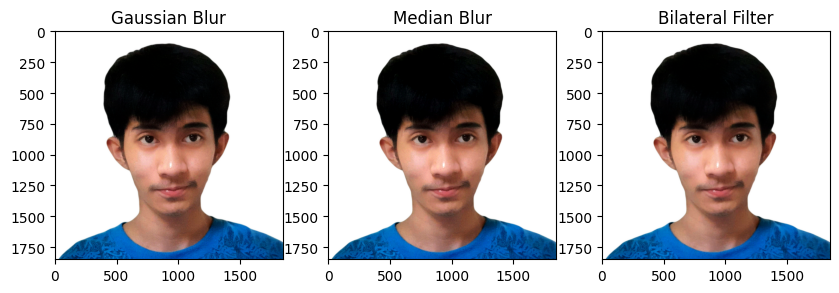

'\nExplanation: This displays the images processed by different filtering techniques (Gaussian,\nMedian, and Bilateral) side by side for comparison.\n'

In [8]:
# Applying Gaussian, Median, and Bilateral filters
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)

"""
cv2.bilateralFilter(): This filter smooths the image while keeping edges sharp, unlike
Gaussian or median filters. It’s useful for reducing noise while preserving details.
"""

# Display the results for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")

plt.show()

"""
Explanation: This displays the images processed by different filtering techniques (Gaussian,
Median, and Bilateral) side by side for comparison.
"""

# **Exercise 6: Sobel Edge Detection**

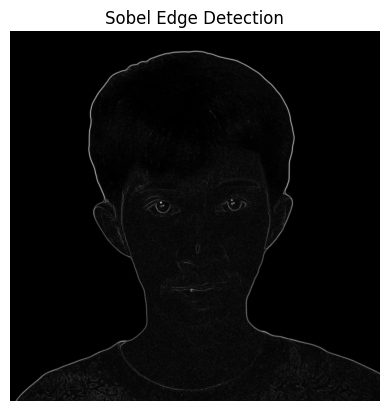

In [9]:
def sobel_edge_detection(img):
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Sobel edge detection in the x direction
  sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
  # Sobel edge detection in the y direction
  sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
  # Combine the two gradients
  sobel_combined = cv2.magnitude(sobelx, sobely)
  return sobel_combined

# Apply sobel edge detection to the uploaded image
sobel_edges = sobel_edge_detection(image)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

# **Exercise 7: Prewitt Edge Detection**

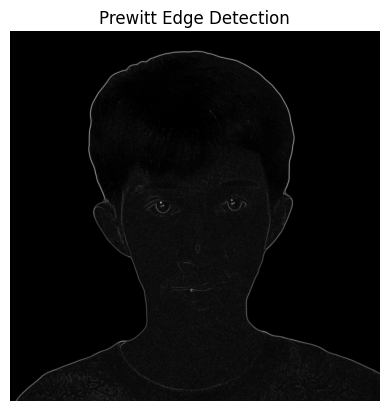

In [10]:
def prewitt_edge_detection(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Prewitt operator kernels for x and y directions
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
    # Applying the Prewitt operator
    prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
    prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)
    # Combine the x and y gradients by converting to floating point
    prewitt_combined = cv2.magnitude(prewittx, prewitty)
    return prewitt_combined

# Apply Prewitt edge detection to the uploaded image
prewitt_edges = prewitt_edge_detection(image)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()

# **Exercise 8: Laplacian Edge Detection**

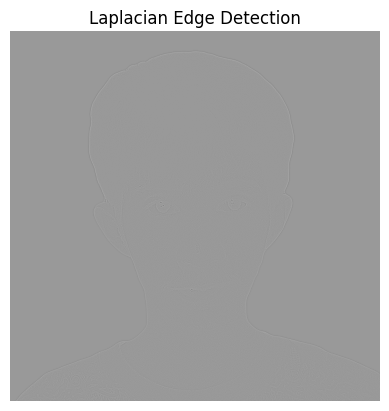

In [11]:
def laplacian_edge_detection(img):
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Apply Laplacian operator
  laplacian = cv2.Laplacian(gray, cv2.CV_64F)
  return laplacian

# Apply Laplacian edge detection to the uploaded image
laplacian_edges = laplacian_edge_detection(image)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()

# **Exercise 9: Bilateral Filter**

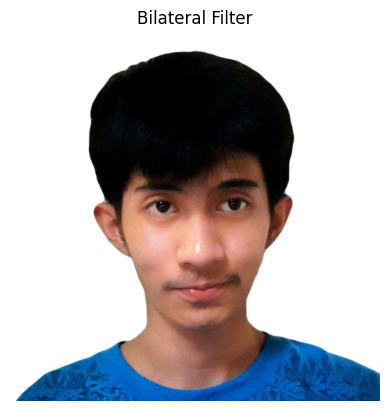

In [12]:
def bilateral_blur(img):
  bilateral = cv2.bilateralFilter(img, 9, 75, 75)
  return bilateral

# Apply Bilateral filter to the uploaded image
bilateral_blurred = bilateral_blur(image)
plt.imshow(cv2.cvtColor(bilateral_blurred, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')
plt.show()

# **Exercise 10: Box Filter**

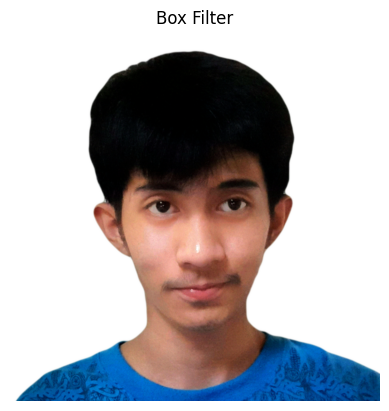

In [13]:
# Box Filter
def box_blur(img):
  box = cv2.boxFilter(img, -1, (5, 5))
  return box

# Apply Box filter to the uploaded image
box_blurred = box_blur(image)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')
plt.show()

# **Exercise 11: Motion Blur**

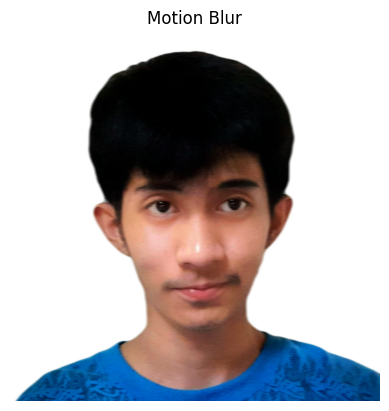

In [14]:
def motion_blur(img):
  # Create motion blur kernel (size 15x15)
  kernel_size = 15
  kernel = np.zeros((kernel_size, kernel_size))
  kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
  kernel = kernel / kernel_size

  # Apply motion blur
  motion_blurred = cv2.filter2D(img, -1, kernel)
  return motion_blurred

# Apply Motion blur to the uploaded image
motion_blurred = motion_blur(image)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')
plt.show()

# **Exercise 12: Unsharp Masking (Sharpening)**

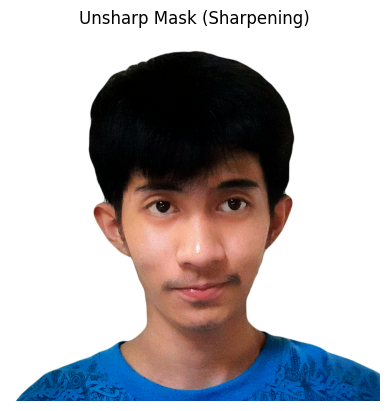

In [15]:
def unsharp_mask(img):
  # Create a Gaussian blur version of the image
  blurred = cv2.GaussianBlur(img, (9, 9), 10.0)
  # Sharpen by adding the difference between the original and the blurred image
  sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
  return sharpened

# Apply Unsharp Masking to the uploaded image
sharpened_image = unsharp_mask(image)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')
plt.show()

Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_b processed_image = process_image(image, action)prewitt


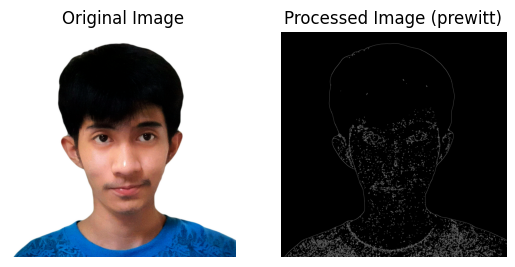

In [16]:
# Update process_image function to include new blurring techniques
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (5, 5), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, 5)
  elif action == 'canny':
    return cv2.Canny(img, 100, 200)
  elif action == 'sobel':
    return sobel_edge_detection(img)
  elif action == 'laplacian':
    return laplacian_edge_detection(img)
  elif action == 'prewitt':
    return prewitt_edge_detection(img)
  elif action == 'bilateral_blur':
    return bilateral_blur(img)
  elif action == 'box_blur':
    return box_blur(img)
  elif action == 'motion_blur':
    return motion_blur(img)
  elif action == 'unsharp_mask':
    return unsharp_mask(img)
  else:
    return img

# Add new blurring options for interactive processing
# Add new blurring options for interactive processing
action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_b processed_image = process_image(image, action)")
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")

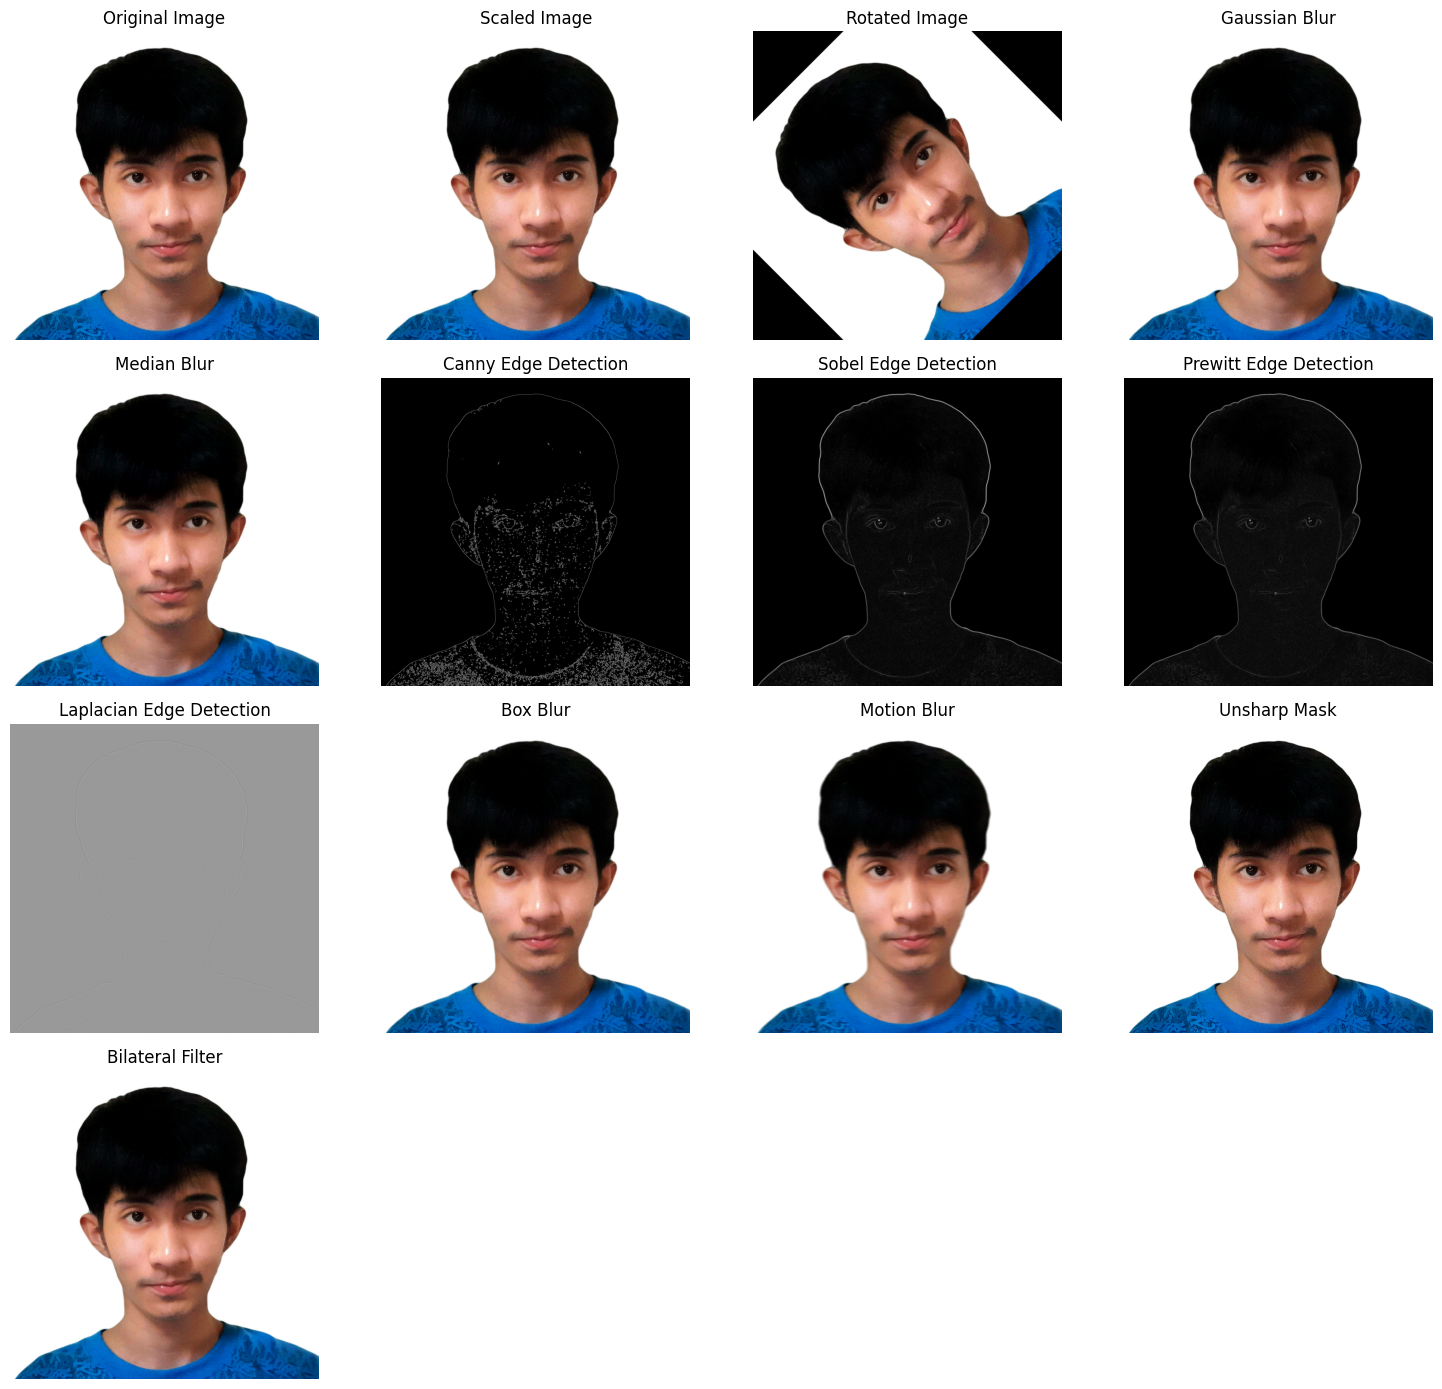

In [20]:
# Set up a large figure for the subplots
plt.figure(figsize=(15, 14))

# Display the original image
plt.subplot(4, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')  # Hide the axis

# Display the scaled image
plt.subplot(4, 4, 2)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title("Scaled Image")
plt.axis('off')

# Display the rotated image
plt.subplot(4, 4, 3)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.axis('off')

# Display the image with Gaussian blur applied
plt.subplot(4, 4, 4)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

# Display the image with median blur applied
plt.subplot(4, 4, 5)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')

# Display the image with Canny edge detection applied
plt.subplot(4, 4, 6)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

# Display the image with Sobel edge detection applied
plt.subplot(4, 4, 7)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

# Display the image with Prewitt edge detection applied
plt.subplot(4, 4, 8)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

# Display the image with Laplacian edge detection applied
plt.subplot(4, 4, 9)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

# Display the image with Bilateral filter applied
plt.subplot(4, 4, 13)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')

# Display the image with Box blur applied
plt.subplot(4, 4, 10)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Blur")
plt.axis('off')

# Display the image with motion blur applied
plt.subplot(4, 4, 11)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')

# Display the image with unsharp mask (sharpening) applied
plt.subplot(4, 4, 12)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask")
plt.axis('off')

# Adjust the layout of the subplots to avoid overlap and make everything fit
plt.tight_layout()
# Show the plot with all the images
plt.show()

# **Conclusion**

You can implement the above code in Google Colab to carry out scaling, rotation, blurring, and edge detection tasks using OpenCV. These exercises will help your students understand how different image processing techniques work in practice.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Exercise 1 - Image Processing Techniques.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Exercise 1 - Image Processing Techniques.ipynb to pdf
[NbConvertApp] Support files will be in Exercise 1 - Image Processing Techniques_files/
[NbConvertApp] Making directory ./Exercise 1 - Image Processing Techniques_files
[NbConvertApp] Making directory ./Exercise 1 - Image Processing Techniques_files
[NbConvertApp] Making directory ./Exercise 1 - Image Processing Techniques_files
[NbConvertApp] Making directory ./Exercise 1 - Image Processing Techniques_files
[NbConvertApp] Making directory ./Exercise 1 - Image Processing Techniques_files
[NbConvertApp] Making directory ./Exercise 1 - Image Processing Techniques_files
[NbConvertApp] Making directory ./Exercise 1 - Image Processing Techniques_files
[NbConvertApp] Making directory ./Exercise 1 - Image Processing Techniques_files
[NbConvertApp] Making directory ./Exercise 1 - Image Processing Techniques_files
[NbConvertApp] Making directory ./Exercise 1 - Image Pr